## Model for Cluster 0 bankruptcy prediction

### importing the libraries

In [38]:
import pandas as pd

In [39]:
dataset=pd.read_csv('output/predicted_cluster_0.csv')
dataset.shape

(792, 29)

In [40]:
dataset.describe()

,Quick Assets/Total Assets,Equity to Liability,Cash/Total Assets,Total debt/Total net worth,Current Assets/Total Assets,Equity to Long-term Liability,Current Liabilities/Liability,Cash/Current Liability,Long-term Liability to Current Assets,Long-term fund suitability ratio (A),...,Cash Flow to Liability,PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax,Total expense/Assets,Total income/Total expense,Cash Flow to Equity,Cash Flow to Total Assets,No-credit Interval,Interest Expense Ratio,Index,Bankrupt?
count,792.000000,792.000000,792.000000,7.920000e+02,792.000000,792.000000,792.000000,7.920000e+02,7.920000e+02,792.000000,...,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,0.354358,0.753620,0.467181,2.525256e-03,0.442191,0.665458,0.707382,1.931071e-09,3.016115e-02,0.446310,...,0.591257,0.621689,0.432008,0.803120,0.534339,0.613040,0.583261,0.577385,2382.832071,0.016414
std,0.113834,0.097394,0.202655,5.022012e-02,0.132898,0.001913,0.195016,3.520893e-09,1.707698e-01,0.177633,...,0.049699,0.078023,0.162750,0.034795,0.006242,0.056689,0.031561,0.002831,1362.151719,0.127142
min,0.046325,0.525912,0.015786,0.000000e+00,0.044381,0.664512,0.169700,1.898792e-11,0.000000e+00,0.230495,...,0.097346,0.276053,0.000000,0.672719,0.440684,0.000000,0.000000,0.511970,8.000000,0.000000
25%,0.273178,0.683586,0.312415,2.114027e-09,0.353163,0.664512,0.559724,5.761542e-10,0.000000e+00,0.317654,...,0.586153,0.582378,0.312346,0.784770,0.532717,0.595391,0.582501,0.577207,1156.250000,0.000000
50%,0.359696,0.757320,0.465924,3.194716e-09,0.446477,0.664512,0.709819,1.113873e-09,0.000000e+00,0.384241,...,0.596340,0.620435,0.427403,0.799990,0.535231,0.620298,0.582782,0.577247,2399.000000,0.000000
75%,0.443807,0.823636,0.619657,4.540979e-09,0.532554,0.665429,0.873984,2.087428e-09,6.423477e-11,0.524861,...,0.603894,0.669664,0.552507,0.820941,0.537092,0.638411,0.583323,0.577483,3619.750000,0.000000
max,0.632244,1.000000,0.884312,1.000000e+00,0.894189,0.674681,1.000000,6.090825e-08,1.000000e+00,1.000000,...,1.000000,0.888510,1.000000,1.000000,0.556418,0.888930,1.000000,0.585964,4617.000000,1.000000


In [41]:
dataset.head()

,Quick Assets/Total Assets,Equity to Liability,Cash/Total Assets,Total debt/Total net worth,Current Assets/Total Assets,Equity to Long-term Liability,Current Liabilities/Liability,Cash/Current Liability,Long-term Liability to Current Assets,Long-term fund suitability ratio (A),...,Cash Flow to Liability,PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax,Total expense/Assets,Total income/Total expense,Cash Flow to Equity,Cash Flow to Total Assets,No-credit Interval,Interest Expense Ratio,Index,Bankrupt?
0,0.204896,0.614638,0.193536,5.967891e-09,0.435557,0.666354,0.878261,2.065208e-10,7.703850e-11,0.278764,...,0.598583,0.579124,0.267145,0.784572,0.536275,0.629105,0.581164,0.582430,8,0
1,0.500339,0.901508,0.844969,1.009967e-09,0.528408,0.664512,0.914354,8.428210e-09,0.000000e+00,0.296061,...,0.595668,0.730871,0.171123,0.888079,0.535090,0.618906,0.580650,0.577207,11,0
2,0.355071,0.748354,0.672360,3.325589e-09,0.394709,0.664512,0.874403,1.826140e-09,0.000000e+00,0.899259,...,0.600540,0.593109,0.179447,0.808265,0.536283,0.630661,0.584107,0.577263,13,0
3,0.380722,0.829376,0.712390,2.019935e-09,0.429432,0.664512,0.735658,3.279457e-09,0.000000e+00,0.420104,...,0.631599,0.590977,0.499927,0.787047,0.540997,0.683182,0.582945,0.577207,14,0
4,0.287887,0.729542,0.487109,3.656599e-09,0.393946,0.664617,0.639089,1.077451e-09,1.000000e+00,0.316129,...,0.593523,0.629166,0.467457,0.798742,0.534468,0.612992,0.582778,0.577337,22,0


In [42]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
indexes=dataset['Index']
bankrupt_=dataset['Bankrupt?']
dataset=pd.DataFrame(sc.fit_transform(dataset.iloc[:,:-2]),columns=dataset.columns[:-2])
dataset['Index']=indexes
dataset['Bankrupt?']=bankrupt_

In [43]:
dataset.describe()

,Quick Assets/Total Assets,Equity to Liability,Cash/Total Assets,Total debt/Total net worth,Current Assets/Total Assets,Equity to Long-term Liability,Current Liabilities/Liability,Cash/Current Liability,Long-term Liability to Current Assets,Long-term fund suitability ratio (A),...,Cash Flow to Liability,PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax,Total expense/Assets,Total income/Total expense,Cash Flow to Equity,Cash Flow to Total Assets,No-credit Interval,Interest Expense Ratio,Index,Bankrupt?
count,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,...,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,792.000000,792.000000
mean,5.225898e-16,-2.915737e-16,-4.934325e-17,4.485750e-18,-1.816729e-16,-1.689782e-14,3.498885e-16,1.570012e-17,2.467162e-17,1.682156e-16,...,3.274597e-16,-1.547584e-16,-4.642751e-16,-1.318810e-15,5.169826e-15,1.436561e-15,-6.997769e-16,-1.447439e-14,2382.832071,0.016414
std,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,...,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1.000632e+00,1362.151719,0.127142
min,-2.707699e+00,-2.339485e+00,-2.228811e+00,-5.031553e-02,-2.995246e+00,-4.947771e-01,-2.758854e+00,-5.434108e-01,-1.767304e-01,-1.215720e+00,...,-9.944335e+00,-4.432712e+00,-2.656103e+00,-3.750106e+00,-1.501430e+01,-1.082094e+01,-1.849229e+01,-2.312020e+01,8.000000,0.000000
25%,-7.136013e-01,-7.195277e-01,-7.641748e-01,-5.031549e-02,-6.703218e-01,-4.947771e-01,-7.576363e-01,-3.850650e-01,-1.767304e-01,-7.247381e-01,...,-1.027680e-01,-5.041583e-01,-7.357144e-01,-5.277218e-01,-2.599986e-01,-3.115250e-01,-2.408828e-02,-6.315726e-02,1156.250000,0.000000
50%,4.692077e-02,3.801897e-02,-6.202750e-03,-5.031546e-02,3.227446e-02,-4.947771e-01,1.250512e-02,-2.322461e-01,-1.767304e-01,-3.496424e-01,...,1.023240e-01,-1.609098e-02,-2.831208e-02,-9.000653e-02,1.429300e-01,1.281132e-01,-1.517693e-02,-4.886454e-02,2399.000000,0.000000
75%,7.862781e-01,7.193520e-01,7.528688e-01,-5.031544e-02,6.803741e-01,-1.533062e-02,8.548358e-01,4.443658e-02,-1.767304e-01,4.424901e-01,...,2.544139e-01,6.152596e-01,7.408622e-01,5.125026e-01,4.412580e-01,4.478439e-01,1.970269e-03,3.463273e-02,3619.750000,0.000000
max,2.442688e+00,2.531325e+00,2.059634e+00,1.987461e+01,3.403251e+00,4.823563e+00,1.501426e+00,1.676122e+01,5.682807e+00,3.119021e+00,...,8.229554e+00,3.421922e+00,3.492167e+00,5.661900e+00,3.539568e+00,4.869813e+00,1.321272e+01,3.032047e+00,4617.000000,1.000000


In [45]:
dataset.head()

,Quick Assets/Total Assets,Equity to Liability,Cash/Total Assets,Total debt/Total net worth,Current Assets/Total Assets,Equity to Long-term Liability,Current Liabilities/Liability,Cash/Current Liability,Long-term Liability to Current Assets,Long-term fund suitability ratio (A),...,Cash Flow to Liability,PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax,Total expense/Assets,Total income/Total expense,Cash Flow to Equity,Cash Flow to Total Assets,No-credit Interval,Interest Expense Ratio,Index,Bankrupt?
0,-1.313813,-1.427902,-1.351150,-0.050315,-0.049945,0.468666,0.876781,-0.490114,-0.176730,-0.943814,...,0.147493,-0.545892,-1.013621,-0.533406,0.310387,0.283575,-0.066476,1.782767,8,0
1,1.283210,1.519410,1.865371,-0.050316,0.649159,-0.494777,1.061974,1.846476,-0.176730,-0.846377,...,0.088803,1.400237,-1.603992,2.443249,0.120338,0.103545,-0.082777,-0.063157,11,0
2,0.006262,-0.054099,1.013095,-0.050315,-0.357508,-0.494777,0.856988,-0.029821,-0.176730,2.551530,...,0.186903,-0.366533,-1.552813,0.147940,0.311626,0.311037,0.026831,-0.043235,13,0
3,0.231740,0.778327,1.210748,-0.050315,-0.096066,-0.494777,0.145084,0.383209,-0.176730,-0.147620,...,0.812232,-0.393878,0.417581,-0.462236,1.067405,1.238107,-0.010026,-0.063157,14,0
4,-0.584304,-0.247373,0.098399,-0.050315,-0.363250,-0.440125,-0.350414,-0.242597,5.682807,-0.733329,...,0.045611,0.095883,0.217948,-0.125916,0.020642,-0.000839,-0.015298,-0.017264,22,0


C:\Windows\Temp\ipykernel_17988\3504842855.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


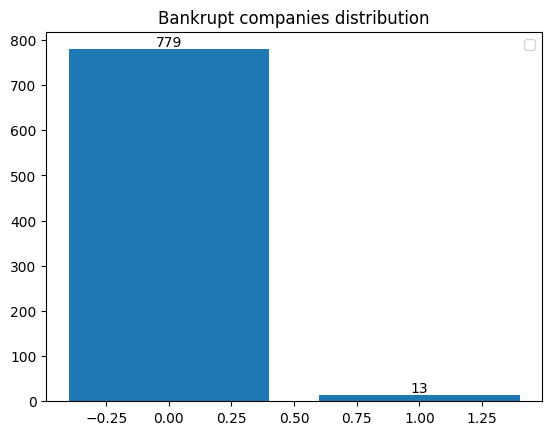

In [44]:
import matplotlib.pyplot as plt

categories=[0,1]
values=[len(dataset[dataset['Bankrupt?']==0]),len(dataset[dataset['Bankrupt?']==1])]
bars = plt.bar(x=categories, height=values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title("Bankrupt companies distribution")
plt.legend()
plt.show()